In [2]:
from utils import plot_result,plot_result_grid

# 0 tl;dr

- Using a single DDPG agent we are able to solve the task in 603 episodes.
- The DDPG agent was created from scratch, adapting the first project (navigation) and verified with Udacity's DDPG for the pendulum task for sanity check. The Udacity's version of OUNoise was adapted.
- This task is very sensitive to hyper-parameter tuning:
1. Different architectures were tested and ultimately a simple 256-128 was chosen.
2. The choice of learning rate is very important. Using the default value from Udacity's DDPG for pendulum the agent was not able to learn; instead I used the standard values of the Adam Optimizer (lr = 1e-3)
3. The OUNoise was modified to 1) anneal the value of the theta parameter, to reduce the ammount of correlated noise and 2) to use noise from a standard normal distribution. The latter was also very relevant to allow the agent converge.

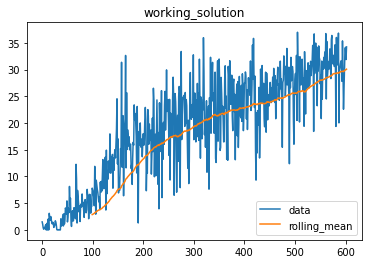

In [3]:
plot_result('./working_solution')


# 1. Task and implemented algorithms
The task was to use a Deep Reinforcement Learning agent to train double-jointed arm can move to target locations. For a more complete description of the problem, please review the README.md of this repository.

To accomplish this, I implemented the DDPG algorithm. I chose the single agent variant, though I did briefly try doing the multi-agent adaptation of DDPGO for the 20 agents task.

# 2 Agent implementation.

The reported agent was trained using the following hyperparameters and architecture:

1. Batch size = 128.
2. Theta parameter of OUNoise linearly annealed between 0.20 and 0.15.
3. LR = 1e-3 for both actor and critic. Default ADAM optimizers options were used.
4. The Actor NN has two layers of 256 and 128 units, with a BatchNorm layer for the outputs of the first layer. The output activation function is a tanh; intermediate layers use ReLU.
5. The Critic NN has 1 layer of 256 units for the state which is concatenated with the action (dim =4). This concatenated layer is fed into a final layer of 128 units. Intermediate layers use ReLU.
6. Gradient clipping was perfomed on the critic network, as proposed in Udacity's course.
7. As opposed to Udacity's implementation of the OUNoise, np.random.randn was used to generate noise from a standard normal distribution. The reviewed implementation of OUNoise used random.random(), which generates values uniformly from the (0,1) range. This modifies the distribution of the noise and also allows negative values.
8. The target networks were updated every 4 time steps for stability purposes.

# 3 Analysis of alternative implementations

Below you can find the results of changing some of the previous parameters. Note that these results can vary across different runs, so to properly conclude about the added value of each hyperparam setting we would need to repeat the hyperparams settings multiple times.

__Baseline__ means the hyperparams specified in the previous section; each row is the result of modifying one hyperparam.

| Option | Episode at which task is solved (Max 750 episodes) |
| --- | --- |
| Baseline | 603 |
| Baseline with uniform noise (0,1)| not solved. Score at 750 episodes: 7.39|
| Baseline with uniform noise (-0.5,0.5)| 459|
| Baseline with critic lr = 1e-4| not solved. Score at 750 episodes: 16.75|
| Baseline with no batch normalization| not solved. Score at 750 episodes: 12.36|
| Baseline with no clipping | not solved. Score at 750 episodes: 24.64|

# Future ideas.

1. The main idea would be to explore the environment with multiple agents. As explained in the course, it has been shown that a task with multiple agents can be easier to learn. We could also test other algorithms like D4PG.

2. PrioritizedReplay could also be tested. At the beggining, I briefly reused my implementation from project 1 (navigation). However, it was not working and I removed it to simplify the code. It could be tested with the best hyper-params to see if there is any impact.